In [1]:
from sympy import *

In [2]:
import heppackv0 as hep

Reading heppackv0.py

Done


## 1) Kinematics

In [3]:
theta,theta_L,F1,F2,G_E,G_M,tau,alpha=symbols('theta theta_B F1 F2 G_E G_M tau alpha',real=True)
t,t0,s,s0=symbols('t t0,s,s0',real=True)
E,M,omega,E_i,E_f=symbols('E M omega E_i E_f',positive=True)

For reasons which become clear at the end of the notebook we calculate $ep$ scattering in the Breit frame, which is defined by a purely space like virtual photon $q^\mu=(0,\vec{q})$. Let the photon run along the positive $x$-axis,
$q^\mu=(0,Q,0,0)$. We take the incoming proton along the negativ $x$-axis. To ensure $q^0=0$ the asignment
$k^\mu=(\sqrt{Q^2/4+M^2},Q/2,0,0)$ or conveniently $k^\mu=(\omega,\sqrt{\omega^2-M^2},0,0)$ is necessary. At the electron photon vertex the same line of arguments also only allows a symmetric arrangement. A massless electron with energy $E$ and angle $\theta/2$ with respect to the $z$-axis is reflected at the $z$-axis. Therefore $p_i^\mu=(E,E\sin\theta/2,0,0)$, $p_f^\mu=(E,-E\sin\theta/2,0,0)$, i.e.

In [4]:
pin=[E,0,theta/2,0]
ki=[omega,M,pi/2,pi]
pf=[E,0,theta/2,pi]
kf=[omega,M,pi/2,0]

resulting in the four-vectors

In [5]:
pin4=hep.fourvec(pin);pin4

In [6]:
pf4=hep.fourvec(pf);pf4

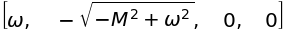

In [7]:
ki4=hep.fourvec(ki);ki4

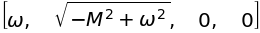

In [8]:
kf4=hep.fourvec(kf);kf4

The four momentum transfer squared $t$ can be calculated at the electron and the proton vertex

In [9]:
qvB1=[0,2*E*sin(theta/2),0,0];qvB1

In [10]:
tBv1=-qvB1[1]**2;tBv1

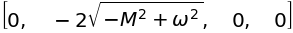

In [11]:
qvB2=[0,-2*sqrt(omega**2-M**2),0,0];qvB2

In [12]:
tBv2=-qvB2[1]**2;tBv2

From $t=(p_f-p_i)^2=(k_i-k_f)^2$ we determine $\sin\theta/2$:

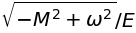

In [13]:
sinthetahalf=sqrt(omega**2-M**2)/E;sinthetahalf

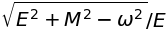

In [14]:
costhetahalf=simplify(sqrt(1-sinthetahalf**2));costhetahalf

The CM energy squared is calculated from $s=(p_i+k_i)^2=M^2+2p_i\cdot k_i$. Substituting $\sqrt{\omega^2-M^2}/E$ for
$\sin\theta/2$ we obtain $s$ and $s_0=s-M^2$

In [15]:
sB=simplify((M**2+2*hep.dotprod4(pin4,ki4)).subs(sin(theta/2),sinthetahalf));print('s=');sB

s=


In [16]:
s0B=sB-M**2;print('s_0=');s0B

s_0=


## 2) Proton as Dirac particle
Treating the proton as a pointlike fermion like the $\mu$ there are 4 independent amplitudes for $m=0$. They are called Dirac amplitudes. We also calculate the squares subsequently.

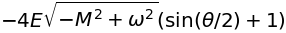

In [17]:
tmp1D=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubu(kf,-1,ki,-1));tmp1D

In [18]:
simplify(tmp1D.subs(sin(theta/2),sinthetahalf))

In [19]:
t1D=-4*E*sqrt(omega**2-M**2)-4*(omega**2-M**2);t1D

In [20]:
t1Dsq=t1D**2;t1Dsq

In [21]:
tmp2D=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubu(kf,-1,ki,1));tmp2D

In [22]:
t2D=tmp2D.subs(cos(theta/2),costhetahalf);t2D

In [23]:
t2Dsq=t2D**2;t2Dsq

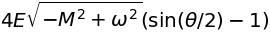

In [24]:
tmp3D=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubu(kf,1,ki,1));tmp3D

In [25]:
simplify(tmp3D.subs(sin(theta/2),sinthetahalf))

In [26]:
t3D=-4*E*sqrt(omega**2-M**2)+4*(omega**2-M**2);t3D

In [27]:
t3Dsq=t3D**2;t3Dsq

In [28]:
tmp4D=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubu(kf,1,ki,-1));tmp4D

In [29]:
t4D=-t2D;t4D

In [30]:
t4Dsq=t4D**2;t4Dsq

The cross section is determined by $\overline{\sum}|T_{{fi}}|^{2}_D$, the average (factor 1/4) of the sum (factor 2)
of all squared amplitudes

In [31]:
tsqavD=simplify(t1Dsq+t2Dsq+t3Dsq+t4Dsq)/2;tsqavD

which can be easily expressed in invariant form:

In [32]:
tsqavD_inv=4*s0**2+2*t**2+4*t*s;print('tsqav_inv=');tsqavD_inv

tsqav_inv=


In [33]:
simplify(4*sB*tBv2+4*s0B**2+2*tBv2**2-tsqavD)

The invariant expression for $\overline{\sum}|T_{{fi}}|^{2}_D$ was derived in the eemumu notebook using only the crossing symmetry. This method is here verified, at least for $m=0$.

## 3) Pauli terms
The proton is no Dirac particle. First of all it has an anomalous magnetic moment. This can be accomodated by including a Pauli Term $\bar{u}(k_f)\frac{{\mathrm i}\sigma^{\mu\nu}q_\nu}{2M}u(k_i)$ in the interaction. Consult the textbooks (e.g. Bjorken Drell) for more details.

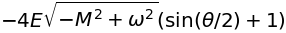

In [34]:
tmp1P=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubuP(kf,-1,ki,-1));tmp1P

In [35]:
t1P=t1D;t1P

In [36]:
t1Psq=t1P**2;t1Psq

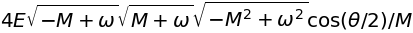

In [37]:
tmp2P=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubuP(kf,-1,ki,1));tmp2P

In [38]:
tmp2P=4*E*(omega**2-M**2)*cos(theta/2)/M;tmp2P

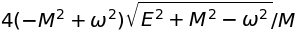

In [39]:
t2P=simplify(tmp2P.subs(cos(theta/2),costhetahalf));t2P

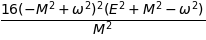

In [40]:
t2Psq=t2P**2;t2Psq

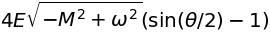

In [41]:
tmp3P=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubuP(kf,1,ki,1));tmp3P

In [42]:
t3P=t3D;t3P

In [43]:
t3Psq=t3P**2;t3Psq

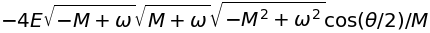

In [44]:
tmp4P=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.ubuP(kf,1,ki,-1));tmp4P

In [45]:
tmp4P=-4*E*(omega**2-M**2)*cos(theta/2)/M;tmp4P

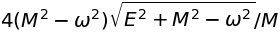

In [46]:
t4P=simplify(tmp4P.subs(cos(theta/2),costhetahalf));t4P

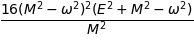

In [47]:
t4Psq=t4P**2;t4Psq

The average of the squared Pauli terms $\overline{\sum}|T_{{fi}}|^{2}_P$ is given by

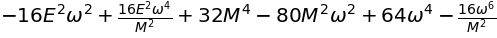

In [48]:
tsqavP=simplify(t1Psq+t2Psq+t3Psq+t4Psq)/2;tsqavP

tsqavP_inv=


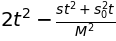

In [49]:
tsqavP_inv=2*t**2-(s*t**2+s0**2*t)/M**2;print('tsqavP_inv=');tsqavP_inv

In [50]:
simplify(2*tBv2**2-(sB*tBv2**2+s0B**2*tBv2)/M**2-tsqavP)

In addition we need the interference terms $T_{fi\, D}T_{fi\, P}$

In [51]:
t1DP=simplify(t1D*t1P);t1DP

In [52]:
t2DP=simplify(t2D*t2P);t2DP

In [53]:
t3DP=simplify(t3D*t3P);t3DP

In [54]:
t4DP=simplify(t4D*t4P);t4DP

The average of $2 T_{fi\, D}T_{fi\, P}$ is given by

In [55]:
tsqavDP=simplify(t1DP+t2DP+t3DP+t4DP);tsqavDP

In [56]:
tsqavDP_inv=4*t**2;print('tsqavDP_inv=');tsqavDP_inv

tsqavDP_inv=


In [57]:
simplify(4*tBv2**2-tsqavDP)

## 4) Rosenbluth formula
We now account for the fact that the proton is not pointlike but a hadron with finite radius by including formfactors
$F_1$ and $F_2$. They may depend on $t$, the only invariant available at the photon proton vertex. The normalization is $F_1(0)=1$, i.e. the proton charge in units of $e$, and $F_2(0)=\kappa$, with $\kappa=1.71$ the
anomalous magnetic momentt of the proton in units of nuclear magnetons. In summary

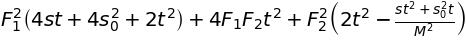

In [58]:
tsqavRB=tsqavD_inv*F1**2+tsqavP_inv*F2**2+F1*F2*tsqavDP_inv;tsqavRB

Traditionally this result for the average of the squared $ep$ scattering amplitudes is presented in 
a form known as Rosenbluth formula

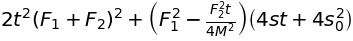

In [59]:
tsqavRB_std=(F1**2-t/4/M**2*F2**2)*(4*s*t+4*s0**2)+2*t**2*(F1+F2)**2;tsqavRB_std

In [60]:
simplify(tsqavRB-tsqavRB_std)

Before calculating the cross section we replace $F_1$ and $F_2$ by the electric and magnetic form factors
$G_E=F_1+\frac{t}{4M^2}F_2$, $G_M=F_1+F_2$ with $G_E(0)=1$ and $G_M(0)=2.71$ (the magnetic moment of the proton in
nuclear magnetons units).

In [61]:
tmp1=(F1+F2).subs(F2,(G_M-G_E)/(1-t/4/M**2))

In [62]:
simplify(tmp1.subs(F1,(G_E-G_M*t/4/M**2)/(1-t/4/M**2)))

for $F_1+F_2$ and

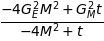

In [63]:
tmp2=simplify((F1**2).subs(F1,(G_E-G_M*t/4/M**2)/(1-t/4/M**2))+(-F2**2*t/4/M**2).subs(F2,(G_M-G_E)/(1-t/4/M**2)));tmp2

for $F_1^2-F_2^2t/4M^2 $ which can be simplified using the definition $\tau=-t/4M^2$. The result is then used in the
alternative expression for $\overline{\sum}|T_{{fi}}|^{2}_{RB}$

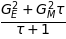

In [64]:
tmp3=simplify(tmp2.subs(t,-4*M**2*tau));tmp3

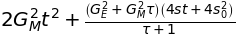

In [65]:
tsqavRB_alt=tmp3*(4*s*t+4*s0**2)+2*t**2*G_M**2;tsqavRB_alt

Tne cross section is obtained by multiplication with the usual kinematic and chage factors

In [66]:
fac=pi*alpha**2/s0**2/t**2;fac

dsigma_RB/dt=


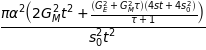

In [67]:
dsigdtRB=fac*tsqavRB_alt;print('dsigma_RB/dt=');dsigdtRB

which can be evaluated in any frame, e.g. in the rest system of the proton (laboratory system). We quote the 
standard formula with a rather intransparent mixture of invariants and lab system variables on the right hand
side
$$
\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\frac{4\alpha^{2}E^{{{}^{{\prime}}2}}\cos^{2}(\theta/2)}{t^{2}[1+(2E/M)\sin^{2}(\theta/2)]}\left(\frac{G_{{\mathrm{E}}}^{2}+\tau G_{{\mathrm{M}}}^{2}}{1+\tau}+2\tau G_{{\mathrm{M}}}^{2}\tan^{2}(\theta/2)\right)$$
with $E$ denoting the energy of the incomig electron and
$E',\theta$ the energy and angle of the sattered electron. 

## 5) Polarization of the recoil proton
For the calculation of polarization phenomena it is useful to have the squared Rosenbluth amplitudes at hand:

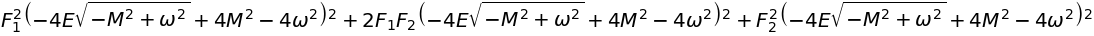

In [68]:
t1sqRB=t1Dsq*F1**2+t1Psq*F2**2+2*F1*F2*t1D*t1P;t1sqRB


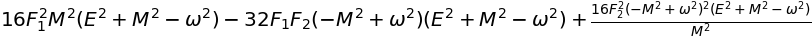

In [69]:
t2sqRB=t2Dsq*F1**2+t2Psq*F2**2+2*F1*F2*t2D*t2P;t2sqRB

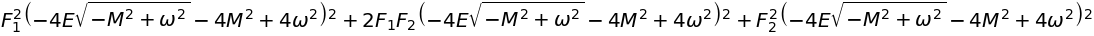

In [70]:
t3sqRB=t3Dsq*F1**2+t3Psq*F2**2+2*F1*F2*t3D*t3P;t3sqRB

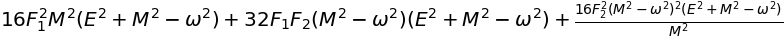

In [71]:
t4sqRB=t4Dsq*F1**2+t4Psq*F2**2+2*F1*F2*t4D*t4P;t4sqRB

We study the polarization transfer of an incoming electron with negative helicity to the recoil
proton. From the definition of the amplitudes given above it follows that up to kinematical factors the polarization, i.e. number of protons with helicity $-1/2$ minus the number of proton with helicity $+1/2$ is given by
$(t_1^2+t_2^2-t_3^2-t_4^2)_{RB}$

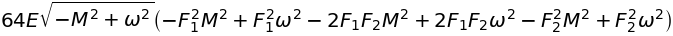

In [72]:
pol=simplify(t1sqRB+t2sqRB-t3sqRB-t4sqRB);pol

which can be further simplified by using the electric and magnetic form factors and expressing
$\tau$ by Breit system variables

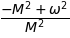

In [73]:
tauB=-tBv2/4/M**2;tauB

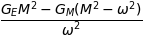

In [74]:
F1B=simplify((G_E+tauB*G_M)/(1+tauB));F1B

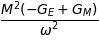

In [75]:
F2B=simplify((G_M-G_E)/(1+tauB));F2B

In [76]:
pol1=pol.subs(F1,F1B)
longpol=simplify(pol1.subs(F2,F2B));print('longpol=');longpol

longpol=


Next the transverse polarization i.e  proton spin along the positive or negative $x$ axis is required. The proton states
with spin up and down along the $x$-axis are calculated via
$$\begin{array}[]{ll}\left|\uparrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(|R\rangle+|L\rangle\right)}\\ \left|\downarrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(-|L\rangle+|R\rangle\right)}\enspace.\end{array}$$
 where $|R\rangle$ or $|L\rangle$ denotes a proton with positive or negative helicity. For more explanations study the notebook eemumu. The ampltudes $t_i$ have been defined as
 $$t_1=\langle e_L,p_L|T|e_L,p_L\rangle\\t_4=\langle e_L,p_R|T|e_L,p_L\rangle\\
 t_2=\langle e_L,p_L|T|e_L,p_R\rangle\\t_3=\langle e_L,p_R|T|e_L,p_R\rangle$$
 
 For incoming protons with negative helicity we have therefore to calculate
 $$\frac{1}{2}((t_1+t_4)^2-(t_4-t_1)^2)=2t_1t_4$$ and similarly $2t_2t_3$ for incoming protons 
 with positive helicity. We calculate the resulting expressions for
 the Dirac, Pauli and interference terms separately.

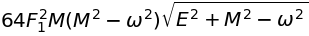

In [77]:
Dterm=simplify(t1D*t4D+t2D*t3D)*2*F1**2;Dterm

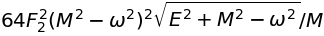

In [78]:
Pterm=simplify(t1P*t4P+t2P*t3P)*2*F2**2;Pterm

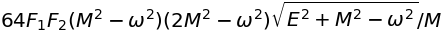

In [79]:
DPterm=simplify(t1D*t4P+t1P*t4D+t2D*t3P+t2P*t3D)*2*F1*F2;DPterm

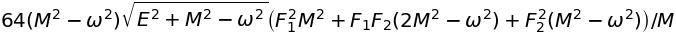

In [80]:
tpol=simplify(Dterm+Pterm+DPterm);tpol

Switching to the electromagnetic form factors yields

transpol=


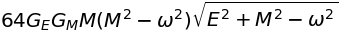

In [81]:
tpol1=simplify(tpol.subs(F1,F1B))
transpol=simplify(tpol1.subs(F2,F2B));print('transpol=');transpol

The kinematical factors drop out for the ratio and therefore the real ratio of  transverse and longitudinal polarization
of the recoil protons is given by 

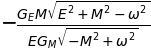

In [82]:
ToverL=simplify(transpol/longpol);ToverL

or after inserting the Breit system expressions for $\sin\theta/2$ and $\cos\theta/2$ by hand

ToverL=


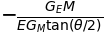

In [83]:
TL_alt=-G_E*M/G_M/E/tan(theta/2);print('ToverL=');TL_alt

This beautiful result was derived by A.I.Akhiezer and M.P. Rekalo (Soviet Journal of Particle and Nuclear
Physics 4,277,1974) with standard methods. At first sight it seems to be not very useful because it is derived in the Breit system and the orientation of spins is generally not an invariant. 
However the transformation from the Breit system to the
labsystem is along the direction of the incoming proton, therefore the longitudinal polarization is invariant. The invariant total cross section for incoming lefthanded electrons is given by $t_1^2+t_2^2$. Therefore the transverse polarization is also invariant. It only remains to express the Breit-system variables $E,\theta$ by ivariants which are then calculated in the lab system. Rename $E$ by $E_B$ and use the Breit-system expression for $s$ given above:

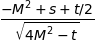

In [84]:
E_B=simplify(((s+M**2-2*omega**2)/2/omega).subs(omega,sqrt(M**2-t/4)));E_B

In the lab (rest system of the incoming proton) the enegy $E_i$ of the incoming electron is given by $s_0/2M$. 

In [85]:
E_i=(s-M**2)/2/M;E_i

The energy $E_f$ of the outgoing electron is easily calculated from four-momentum conservation, $p_i+k_i=p_f+k_f$, i.e. $(q+k_i)^2=M^2$ or $q^2+2q\cdot k_i=0$ yielding $E_f=(2E_iM+t)/2M$

In [86]:
E_f=(s-M**2+t)/2/M;E_f

In [87]:
simplify(2*E_B*sqrt(4*M**2-t)-2*M*(E_i+E_f))

i.e. using $\tau=-t/4M^2$
$$E=\frac{E_i+E_f}{2\sqrt{1+\tau}}$$

On the other hand we have $t=-4E_iE_f\sin^2\theta_L/2$ in the lab and $t=-4E^2\sin^2\theta/2$ in the 
Breit-system, i.e. $\tan^2\theta/2\,(4E^2+t)=\tan^2\theta_L/2\,(4E_iE_f+t)$. Using

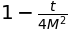

In [88]:
simplify((4*E_i*E_f+t)/(4*E_B**2+t))

we obtain $\tan(\theta/2)=\sqrt{1+\tau}\tan(\theta_L/2)$ and finally for the ratio of transverse and longitudinal
polarizations of the recoil proton in the laboratory system


$$\frac{T}{L}=\frac{-2G_EM}{G_M(E_i+E_f)\tan\frac{\theta_L}{2}}$$

Here $G_E$ and $G_M$ come in with equal weight, whereas $ep$ scattering (traditionally used
for form factor measurements) is according to the Rosenbluth  formula already for moderate $t$ dominated by $G_M$. This makes the evaluation of $G_E(t)$ very difficult. The realization of experiments using a single set up  for determining the transverse and longitudinal polarization
of the recoil protons in a longitudinally polarized electron beam is a major achievement of experimental physics
(see e..g. A.J.R. Puckett et al, arXiv:1707.08587v3).